# Analyzing the `.log` files 

In [1]:
import pandas as pd
import numpy as np

In [4]:
n_cores = np.array([4, 4, 4, 6, 8, 8, 8, 8, 12, 12])
n_mpiprocs = np.array([4, 2, 1, 1, 8, 4, 2, 1, 6, 1])
ns_per_day = np.array([24.554, 4.407, 7.483, 9.667, 42.347, 30.861, 11.885, 7.845, 22.349, 15.049])
hours_per_ns = np.array([0.977, 5.446, 3.207, 2.483, 0.567, 0.778, 2.019, 3.059, 1.074, 1.595])

In [5]:
# Posso fare un plot in cui ad ogni punto associo una coppia

d = {'ncpus': n_cores, 'mpiprocs': n_mpiprocs, 'ns/day': ns_per_day, 'hours/ns': hours_per_ns}
df = pd.DataFrame(data=d)
df

,ncpus,mpiprocs,ns/day,hours/ns
0,4,4,24.554,0.977
1,4,2,4.407,5.446
2,4,1,7.483,3.207
3,6,1,9.667,2.483
4,8,8,42.347,0.567
5,8,4,30.861,0.778
6,8,2,11.885,2.019
7,8,1,7.845,3.059
8,12,6,22.349,1.074
9,12,1,15.049,1.595


In [6]:
#specify path for export
path = "/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_nmRec/membr_Rec_bias.txt"
#export DataFrame to text file
with open(path, 'a') as f:
    df_string = df.to_string(header=False, index=False)
    f.write(df_string)

In [7]:
import matplotlib.pyplot as plt

In [8]:
z = []
for i in range(len(n_cores)):
    z.append('(' + str(n_cores[i]) + ', ' + str(n_mpiprocs[i]) + ')')

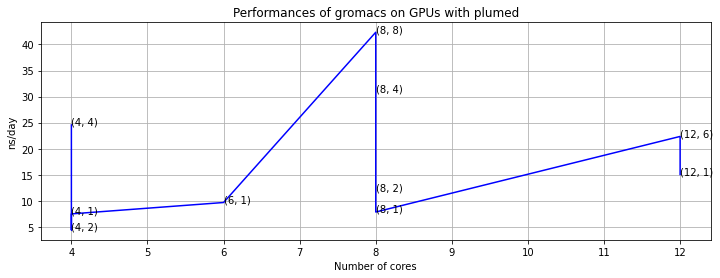

In [17]:
plt.figure().set_figwidth(12)
plt.plot(df["ncpus"], df["ns/day"], 'b')

for i in range(0, len(n_mpiprocs)):
    plt.text(df["ncpus"][i], df["ns/day"][i], z[i])
# qua puoi aggiungerci le labels e allungare il plot 

plt.grid()
plt.xlabel("Number of cores")
plt.ylabel("ns/day")
plt.title("Performances of gromacs on GPUs with plumed")
plt.savefig("/Users/giuseppegambini/Desktop/TESI/simulations/benchmarks/benchmarks_membr/membr_Rec_GPU.png")